In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
x_train[10].shape

(28, 28, 1)

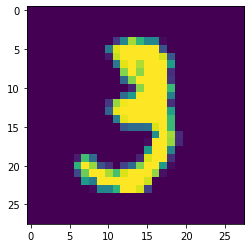

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10])

In [5]:
#reshaping training and testing images
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
#encoding the categorical data
from tensorflow.keras.utils import to_categorical
#one-hot encoding target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [8]:
#building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(28,28,1))) #1st layer
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [11]:
#compile the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [12]:
#train the model
model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs= 3)

Epoch 1/3
1875/1875 [==============================] - 140s 74ms/step - loss: 1.7401 - accuracy: 0.9104 - val_loss: 0.1080 - val_accuracy: 0.9656
Epoch 2/3
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0768 - accuracy: 0.9771 - val_loss: 0.0911 - val_accuracy: 0.9725
Epoch 3/3
1875/1875 [==============================] - 140s 74ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.1109 - val_accuracy: 0.9713


In [13]:
# test the model
model.predict(x_test[:4])

array([[1.4176013e-11, 1.9458865e-15, 3.9139827e-10, 5.6112475e-07,
        7.9441577e-15, 1.4541939e-12, 1.4514041e-15, 9.9999940e-01,
        4.4442094e-10, 1.4715622e-09],
       [7.8077482e-09, 1.0850298e-06, 9.9999118e-01, 1.3313080e-08,
        3.0562490e-11, 1.6971173e-12, 7.4244704e-06, 5.6508162e-13,
        4.0260244e-07, 4.7131691e-15],
       [1.4602137e-05, 9.8045200e-01, 7.6506886e-04, 2.9106718e-07,
        1.7393144e-02, 2.0845197e-04, 1.3600950e-06, 3.6515110e-07,
        1.1592488e-03, 5.4276366e-06],
       [9.9999988e-01, 2.3116017e-14, 5.8992133e-10, 6.3168533e-12,
        8.6383557e-14, 1.2550841e-09, 6.2691790e-08, 5.9520511e-10,
        5.2604420e-08, 4.2852397e-09]], dtype=float32)

In [14]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)